# Projeto 1 - Fundamentos de Sistemas Inteligentes
**Aluno:** Kallebe de Sousa Silva

**Matrícula:** 18/0053485

## Inicialização
Primeiramente será feita a importação das bibliotecas que serão utilizadas e a leitura do arquivo de referência.

In [1]:
import matplotlib.pyplot  as plt
import pandas             as pd

from sklearn.metrics          import confusion_matrix
from sklearn.metrics          import ConfusionMatrixDisplay
from sklearn.metrics          import roc_curve
from sklearn.model_selection  import StratifiedKFold
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import LabelEncoder
from sklearn.tree             import DecisionTreeClassifier

# Lê o arquivo de dados
dataset = pd.read_csv('./SA_heart.csv', index_col='id')

label_col = 'chd'
data      = dataset.drop(label_col, axis=1)

# Codifica coluna 'famhist' para valores numéricos
le = LabelEncoder()
data['famhist'] = le.fit_transform(data['famhist'])

## Análise inicial dos dados
Plotando a estatística inicial do dataset.

sbp             AxesSubplot(0.125,0.657941;0.227941x0.222059)
tobacco      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
ldl          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
adiposity       AxesSubplot(0.125,0.391471;0.227941x0.222059)
typea        AxesSubplot(0.398529,0.391471;0.227941x0.222059)
obesity      AxesSubplot(0.672059,0.391471;0.227941x0.222059)
alcohol            AxesSubplot(0.125,0.125;0.227941x0.222059)
age             AxesSubplot(0.398529,0.125;0.227941x0.222059)
chd             AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

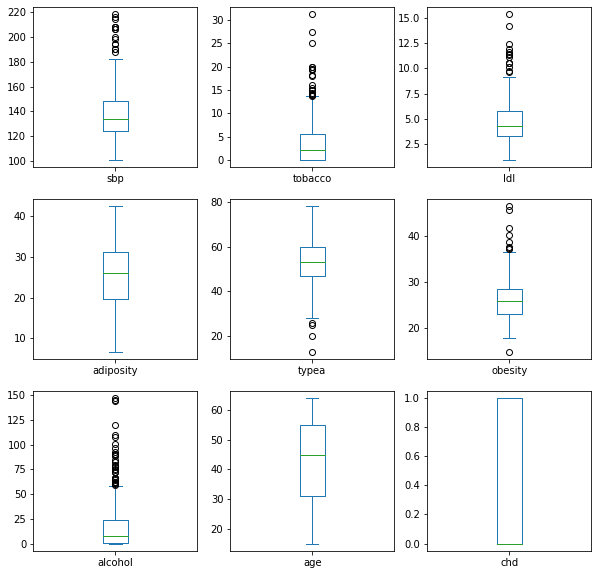

In [2]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,10))

## Árvore de decisão
Será utilizado o algoritmo CART (Classification And Regression Trees) para construir um modelo para o dataset de referência.

90% do dataset será utilizado para o treinament do modelo, enquanto 10% será reservado para teste.

In [3]:
x_train, x_test, y_train, y_test = train_test_split(data, dataset[label_col], test_size=0.1, random_state=42)

model = DecisionTreeClassifier()
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

false_true_positives = []
for train, test in kfold.split(x_train, y_train):
  model.fit(x_train.iloc[train], y_train.iloc[train])
  
  y_pred = model.predict_proba(x_train.iloc[test])[:, 1]
  false_pos, true_pos, _ = roc_curve(y_train.iloc[test], y_pred)

  false_true_positives.append((false_pos, true_pos))

Para analisar o desempenho do modelo criado, foi criada uma matriz de confusão dos dados.

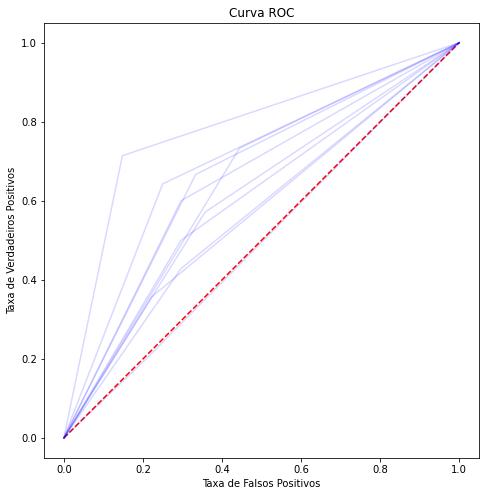

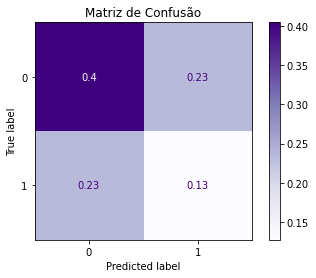

In [4]:
# Curva ROC
# Configuração da plotagem
plt.figure(figsize=(8,8))
plt.axes().set_aspect('equal')
plt.plot([0, 1], [0, 1], 'r', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')

for fp, tp in false_true_positives:
  plt.plot(fp, tp, 'b', label='ROC', alpha=0.15)

plt.show()

# Matriz de confusão
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, normalize='all', cmap='Purples')
plt.title('Matriz de Confusão')
plt.show()